## **Decision Trees**

Classification Trees for categorical responses. We will work with binary responses first.

In [9]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/martinwg/ISA591/refs/heads/main/data/customer_churn.csv')
df.head()

,CustomerId,Lastname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned
0,15802351,Beers,755,Germany,Female,33,6,90560.30,2,1,1,42607.69,0
1,15591091,Goering,644,France,Male,44,5,73348.56,1,1,0,157166.79,1
2,15769582,Kang,586,France,Male,29,3,0.00,2,1,1,142238.54,0
3,15651823,Nkemjika,590,France,Female,60,6,147751.75,1,1,0,88206.04,1
4,15740175,Raynor,732,Germany,Female,42,2,118889.66,2,0,0,87422.15,0


In [10]:
## check for missing
df.isna().sum()

,0
CustomerId,0
Lastname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 78.6 MB/s eta 0:00:00


                                             |          | [  0%]   00:00 -> (? left)


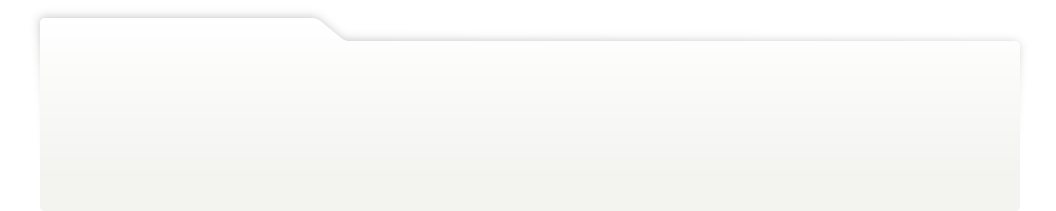
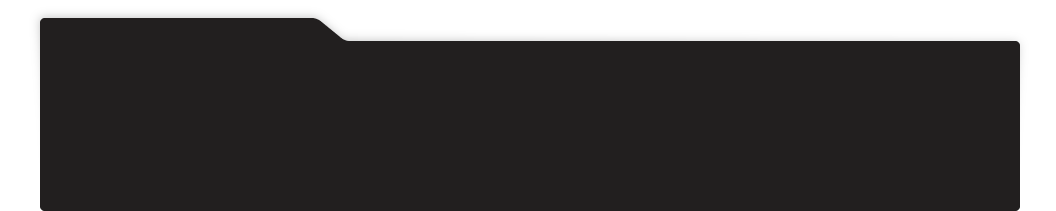
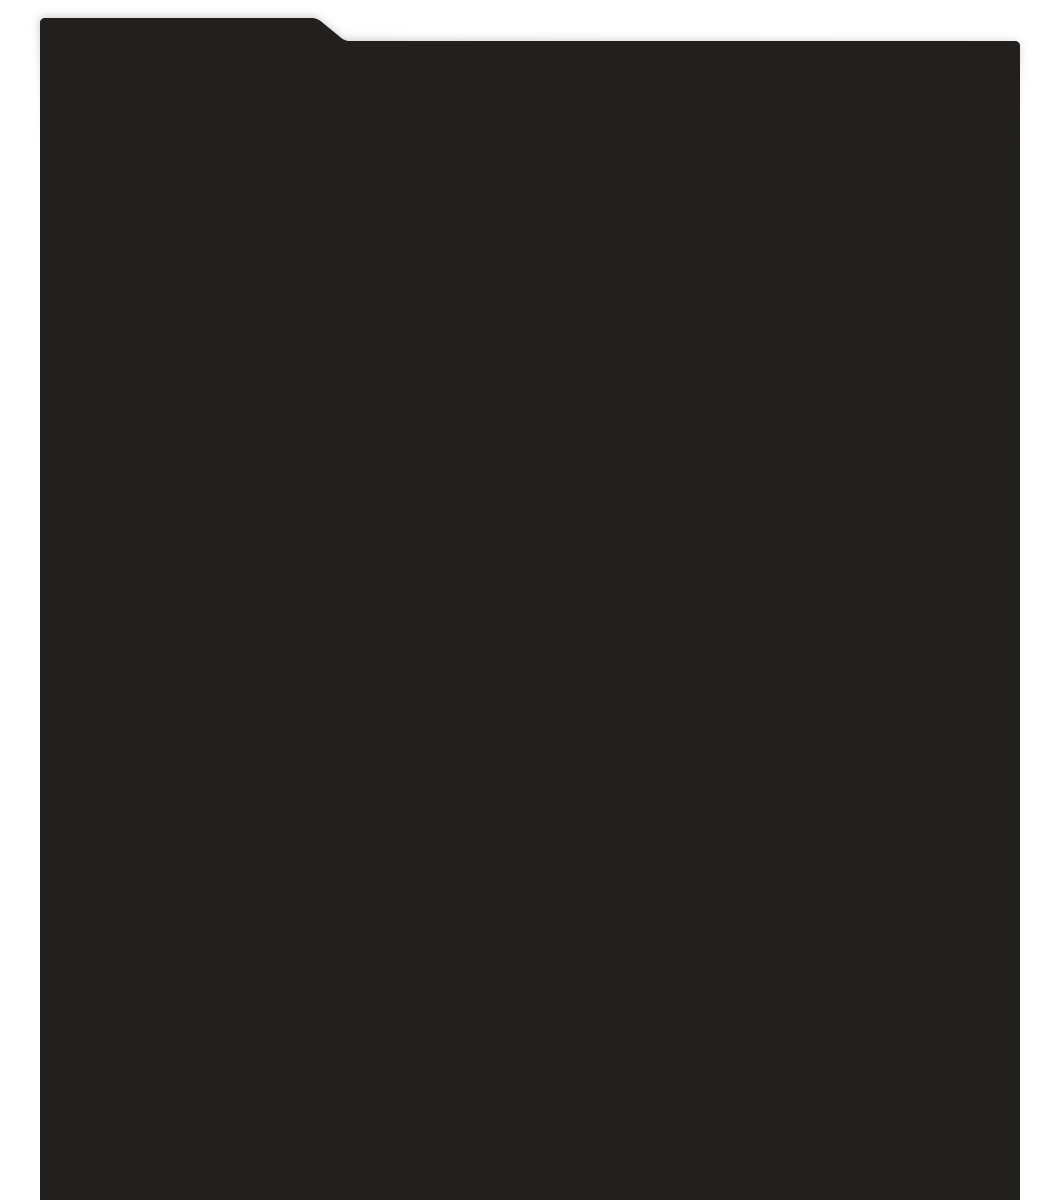
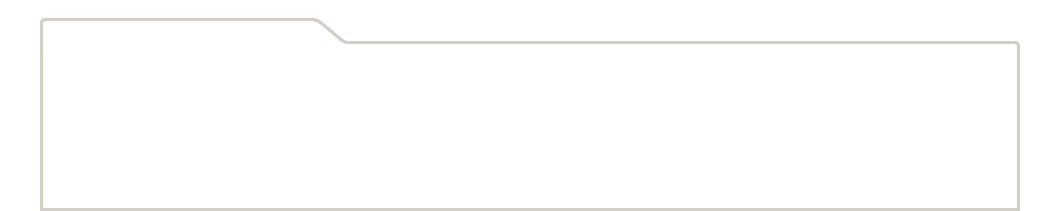
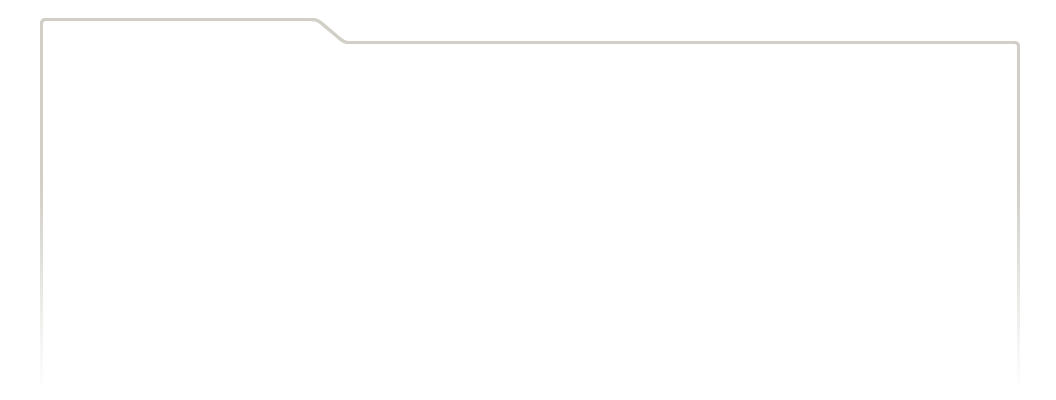
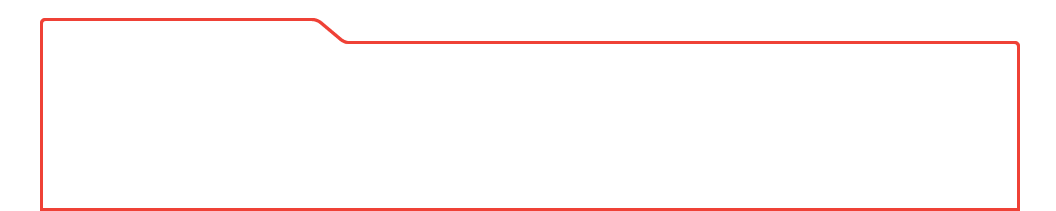
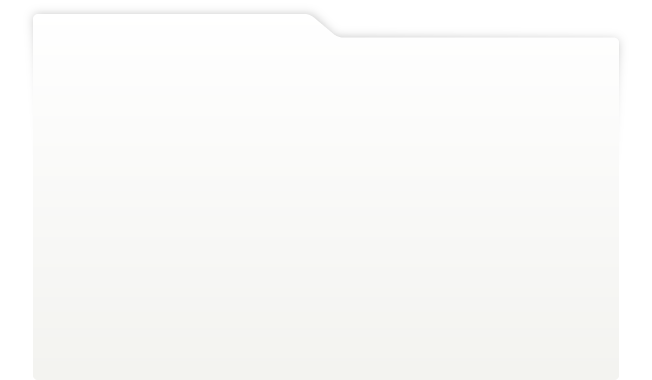
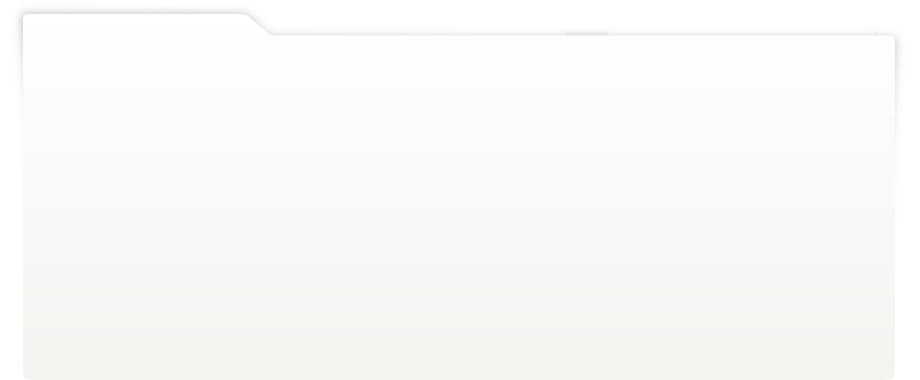
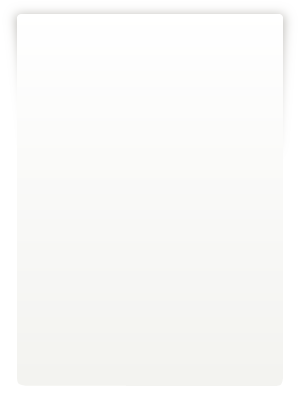
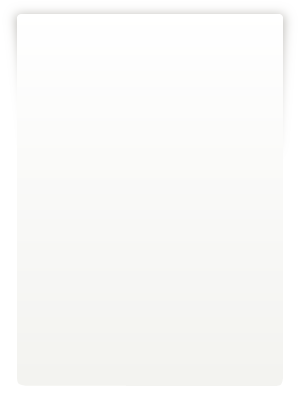
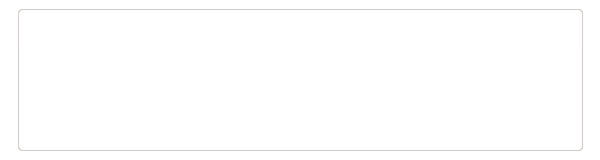
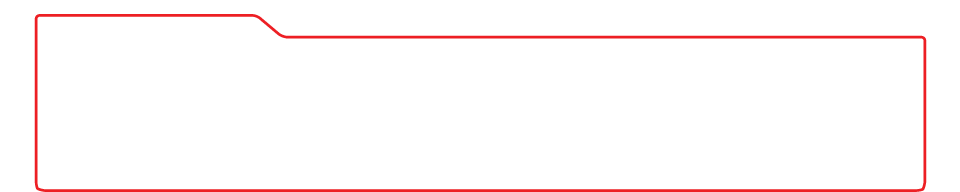
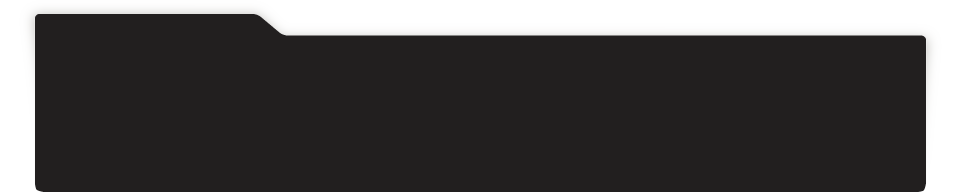
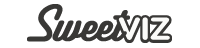
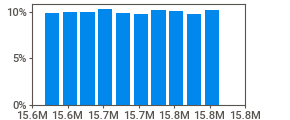
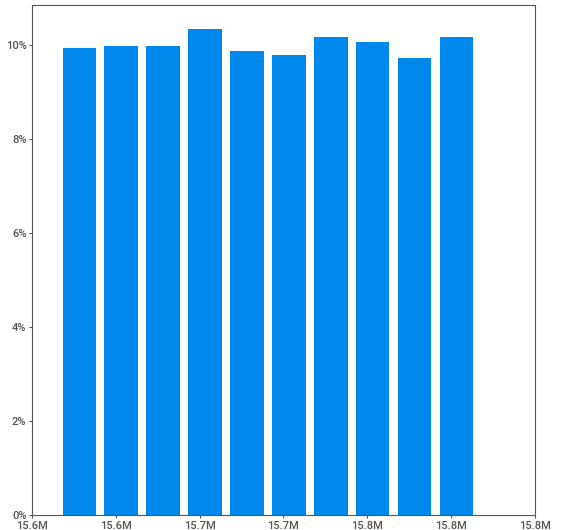
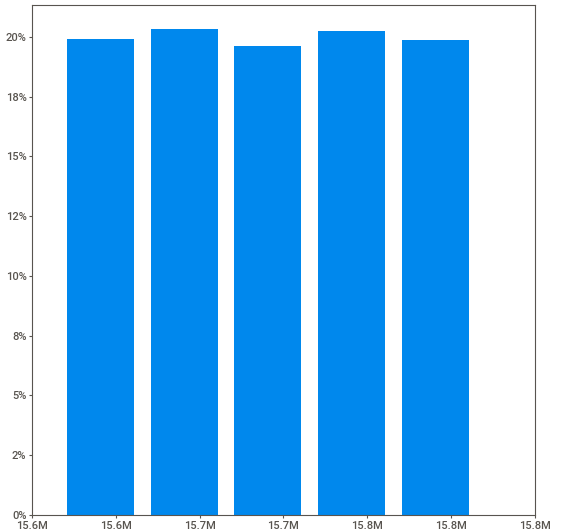
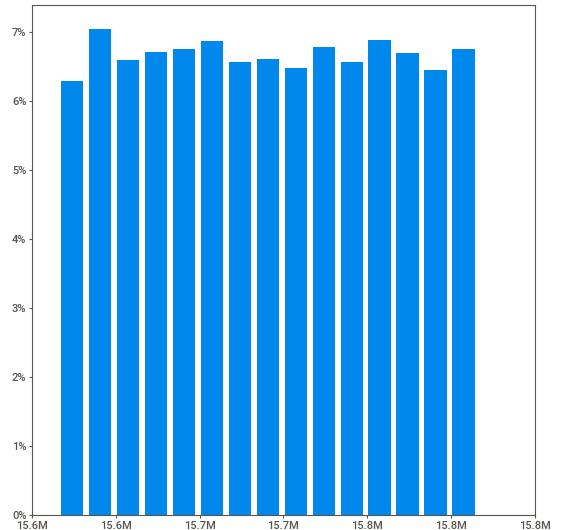
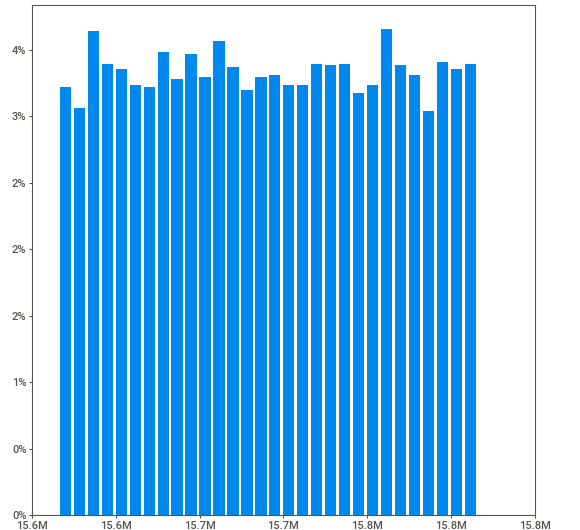
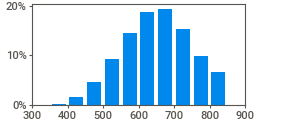
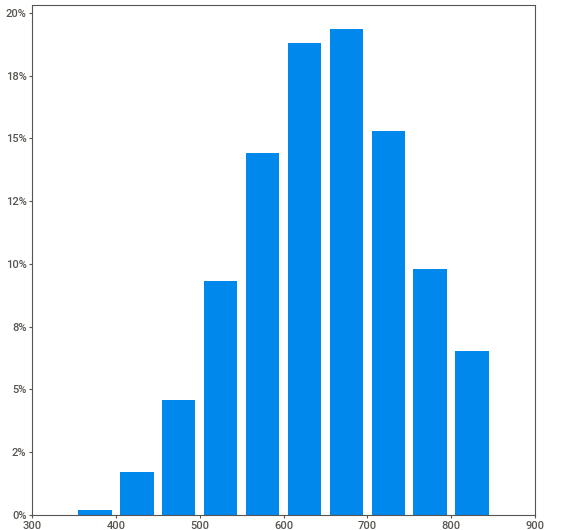
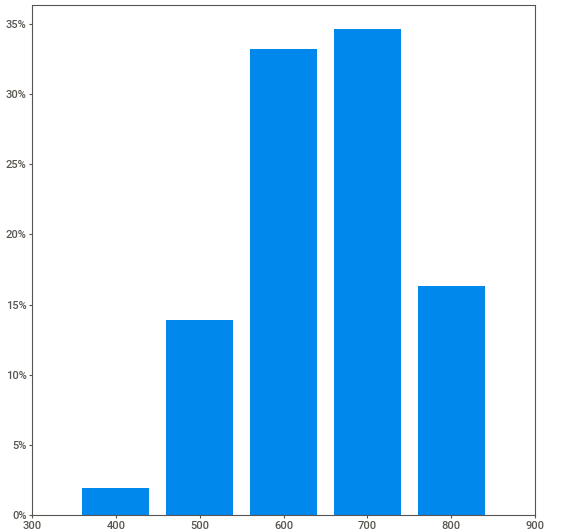
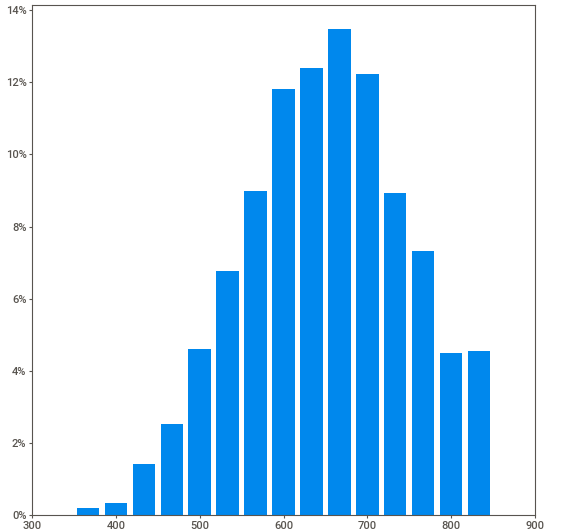
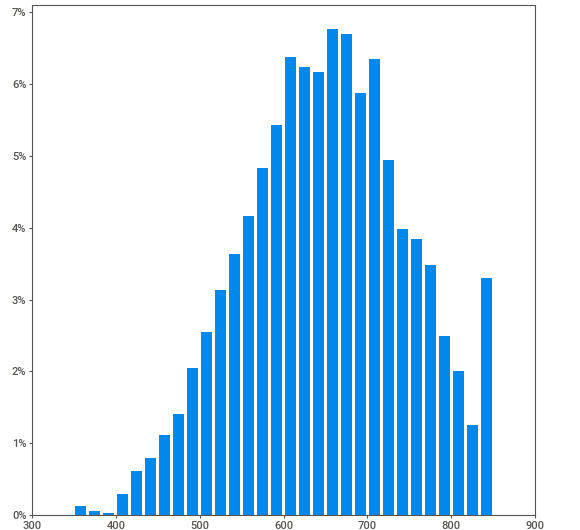
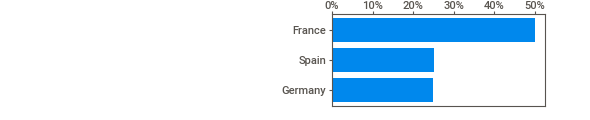
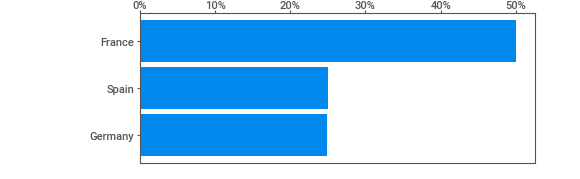
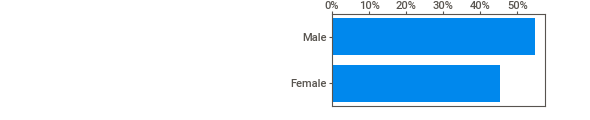
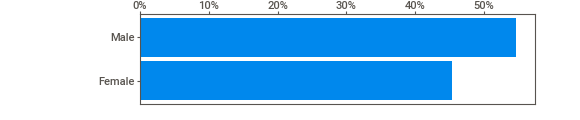
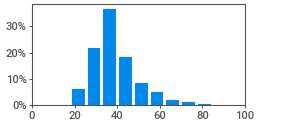
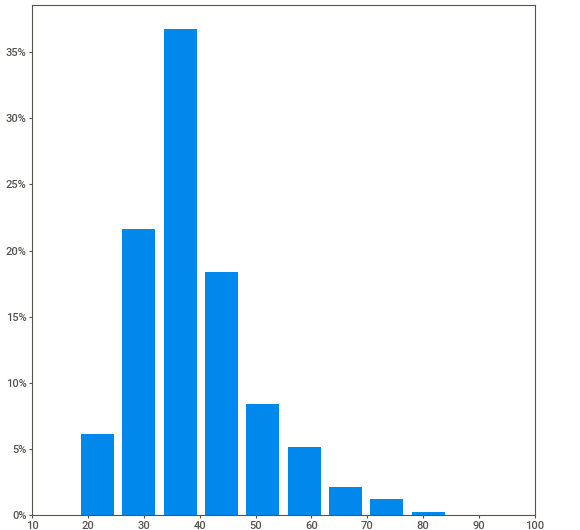
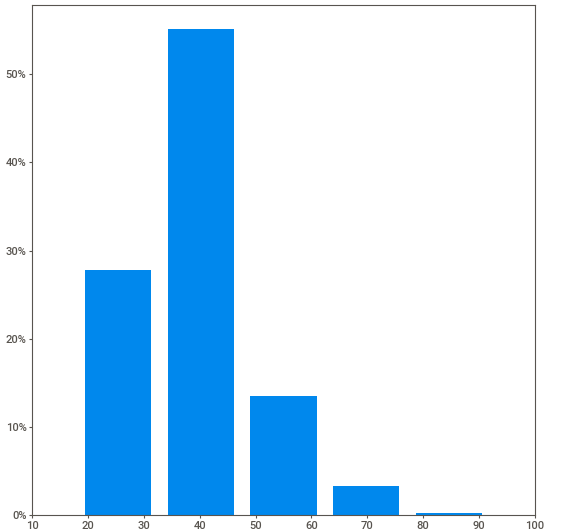
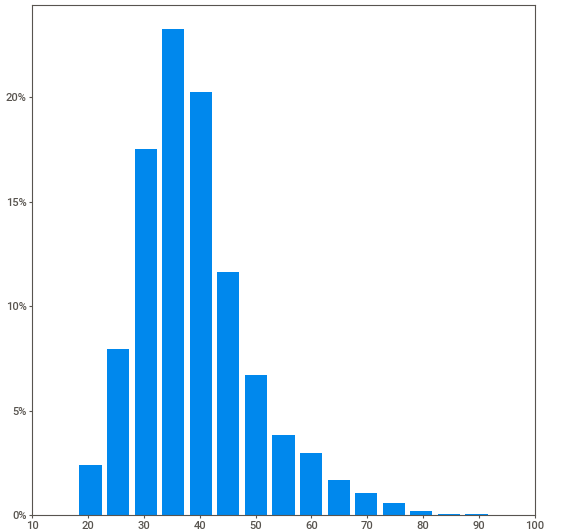
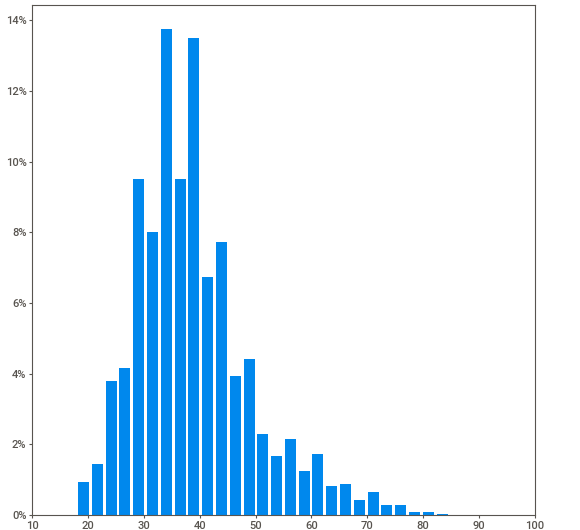
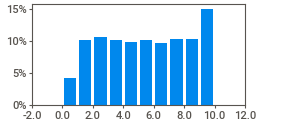
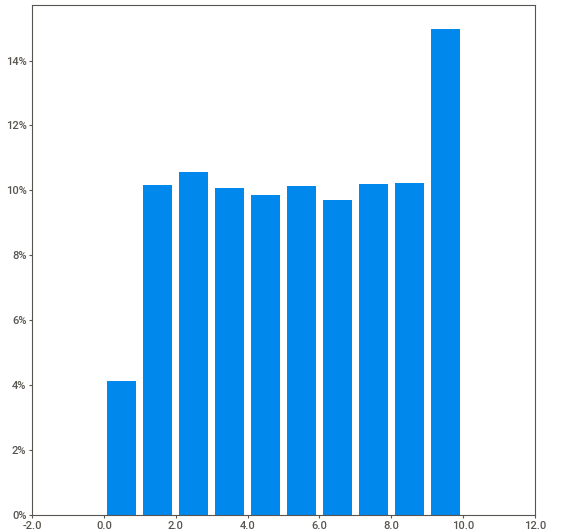
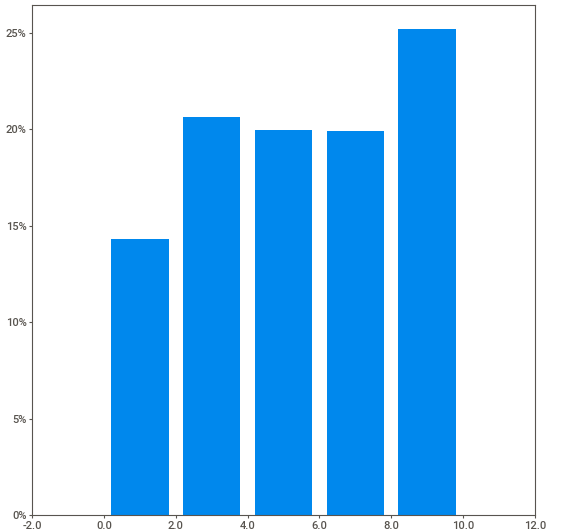
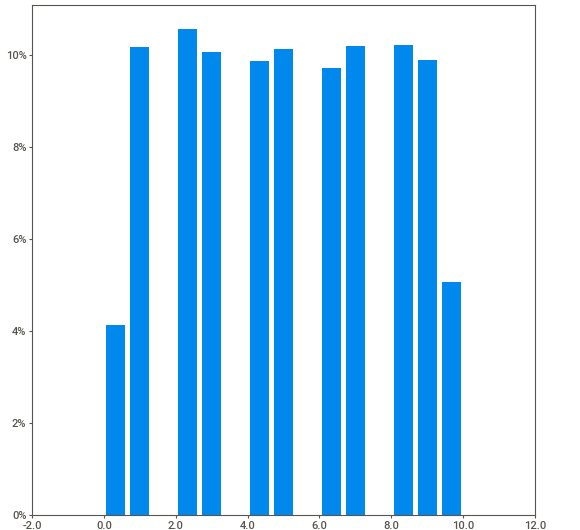
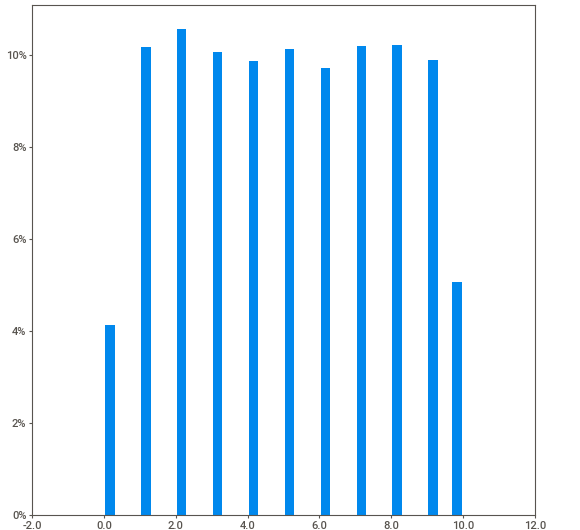
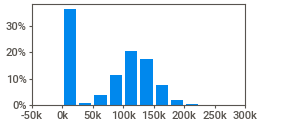
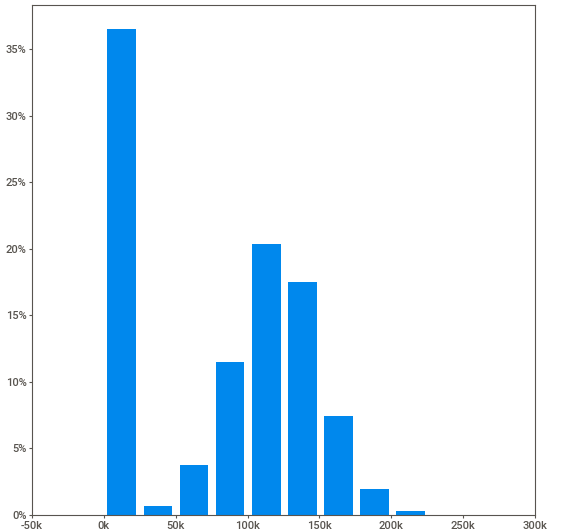
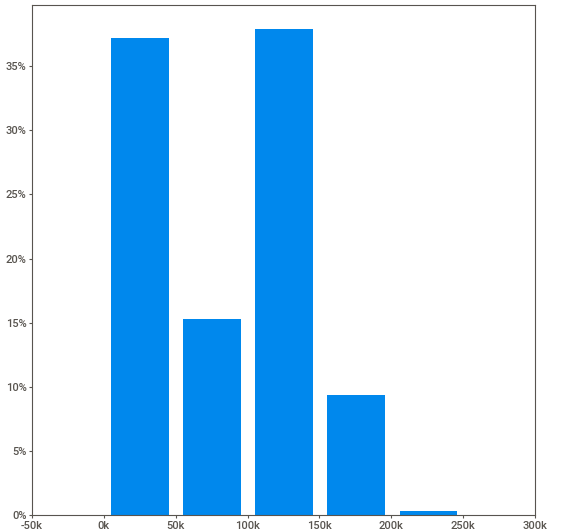
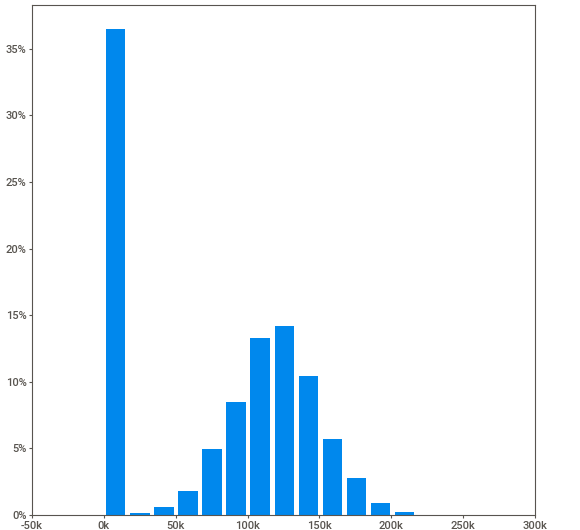
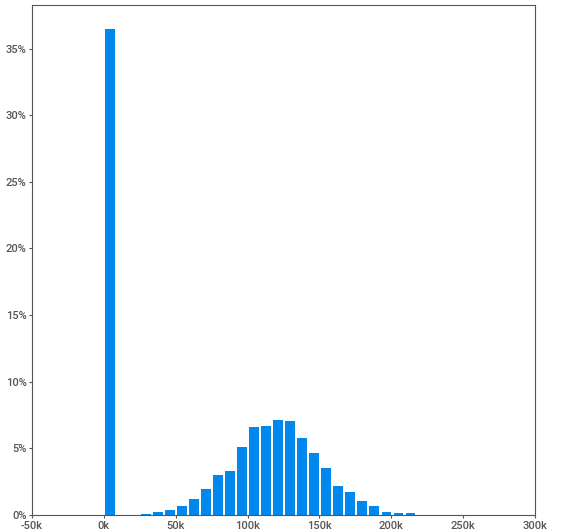
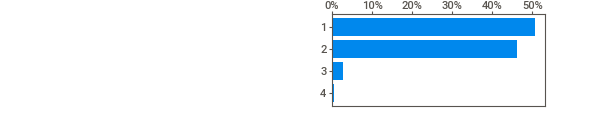
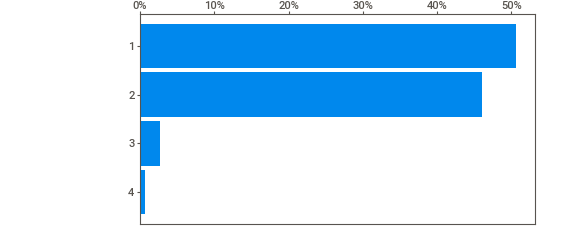
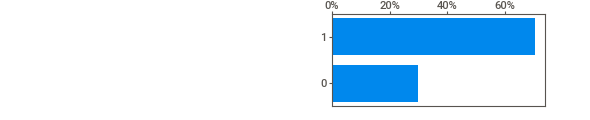
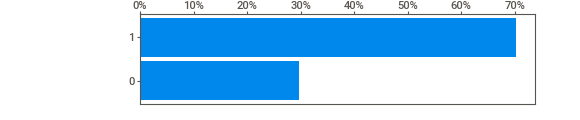
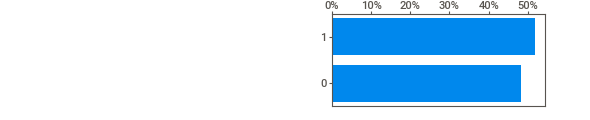
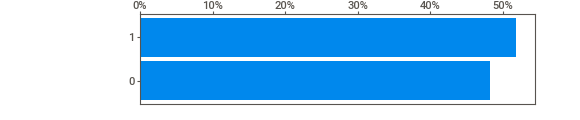
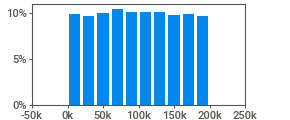
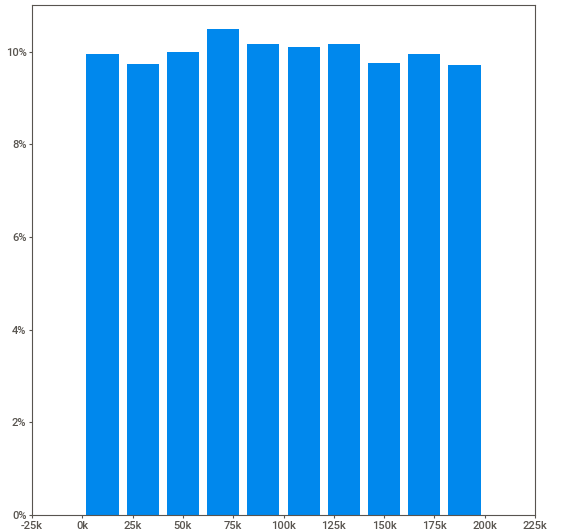
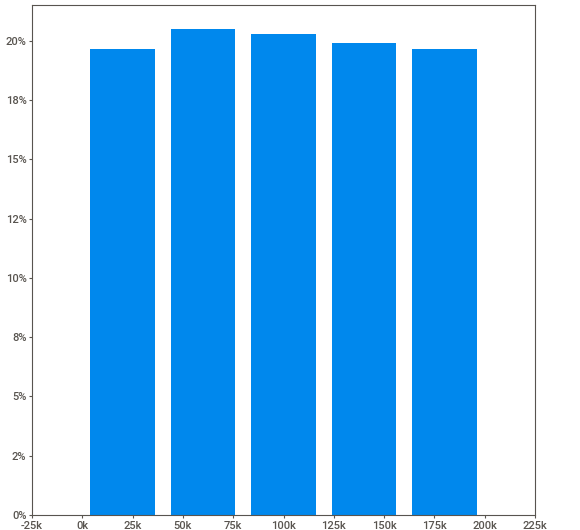
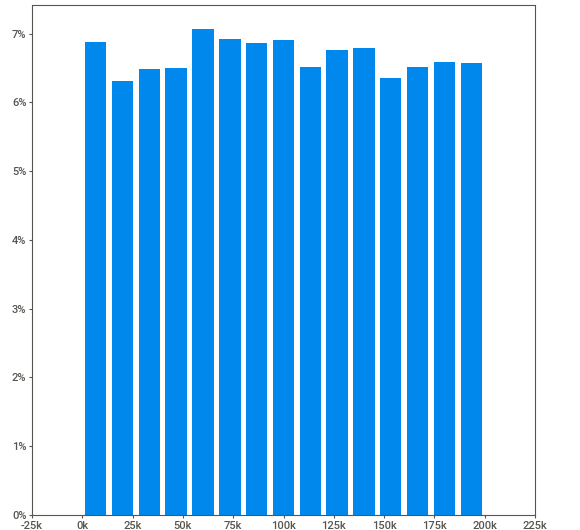
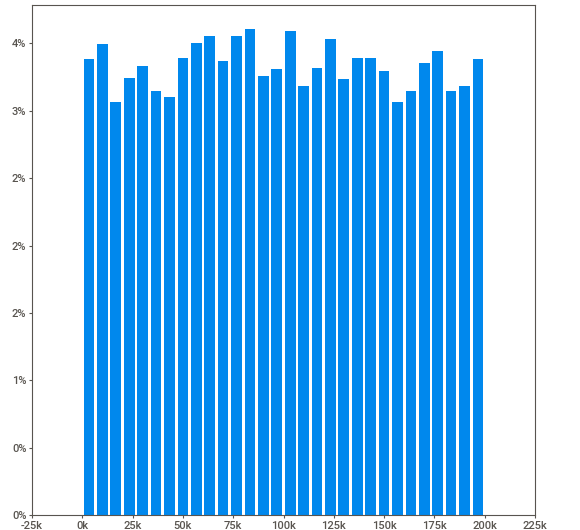
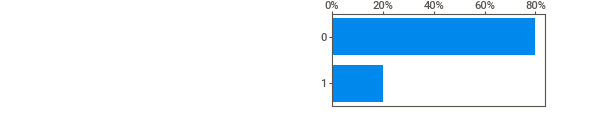
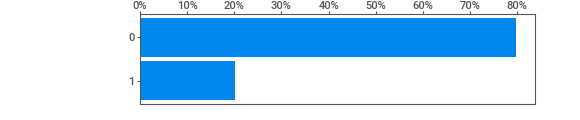
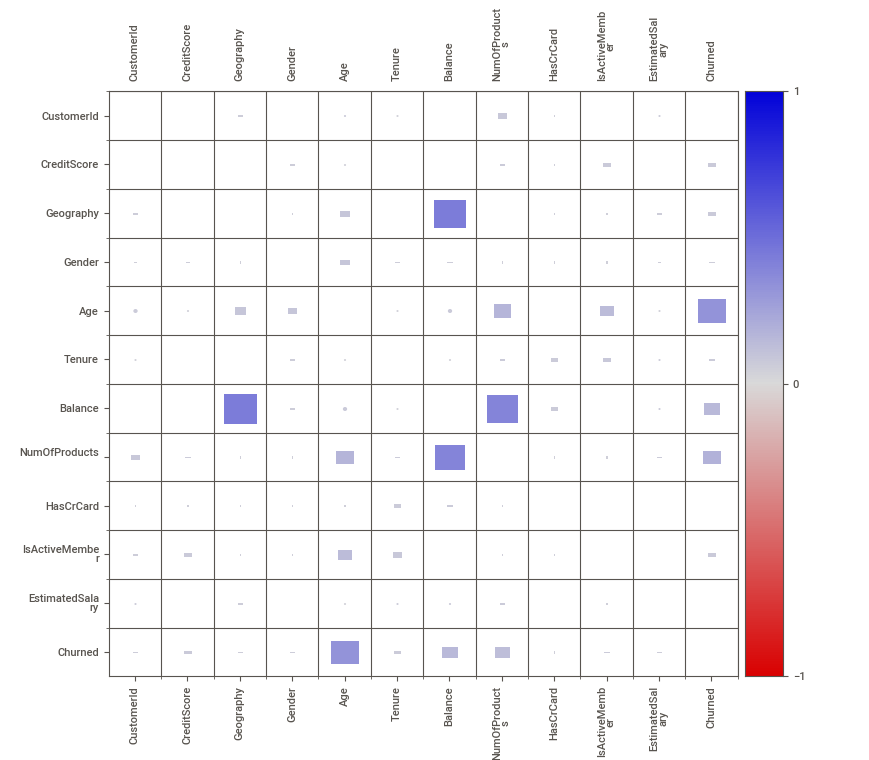
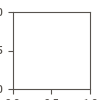

In [3]:
## relationships with Churned
!pip install sweetviz
import sweetviz as sv

my_report = sv.analyze(df)
my_report.show_notebook()

<Axes: xlabel='Churned', ylabel='Age'>

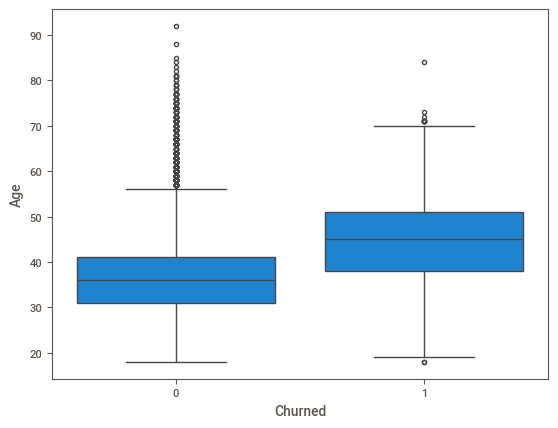

In [4]:
## Let's look at Age
import seaborn as sns
sns.boxplot(x = "Churned", y="Age", data = df)  ## y = Churned -- but use x = "Churned"

<Axes: xlabel='Churned', ylabel='Balance'>

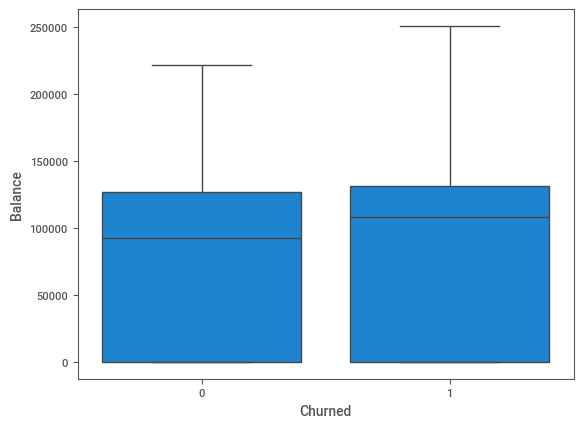

In [5]:
## Let's look at Age
sns.boxplot(x = "Churned", y="Balance", data = df)  ## y = Churned -- but use x = "Churned"

In [12]:
## DROP CustomerId, Lastname
df.drop(columns = ['CustomerId', 'Lastname'], inplace = True)

In [13]:
## Dummy-Encoding ALL CATEGORICAL
## No for loop
## no select dtypes
df = pd.get_dummies(df, drop_first = True) ## an issue for LINEAR MODELS
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned,Geography_Germany,Geography_Spain,Gender_Male
0,755,33,6,90560.30,2,1,1,42607.69,0,True,False,False
1,644,44,5,73348.56,1,1,0,157166.79,1,False,False,True
2,586,29,3,0.00,2,1,1,142238.54,0,False,False,True
3,590,60,6,147751.75,1,1,0,88206.04,1,False,False,False
4,732,42,2,118889.66,2,0,0,87422.15,0,True,False,False


In [14]:
## X matrix and y vector
X = df.drop(columns = ['Churned'])
y = df['Churned']

In [16]:
## this is an IMBALANCED problem
## might need to correct
## if IMBALANCE is extreme (<0.05) we need to correct
y.value_counts() /len(y)

,count
Churned,
0,0.797654
1,0.202346


In [17]:
## 80% training / 20% test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 13)

In [18]:
## If you need to correct for imbalance
## you only work with the TRAINING data set
## e.g., create a new X_train, y_train (0.5, 0.5)

In [23]:
## Fit a decision tree (classification)
from sklearn.tree import DecisionTreeClassifier

## instance
dt = DecisionTreeClassifier(max_depth = 1) ## stopping criteria

## fit
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

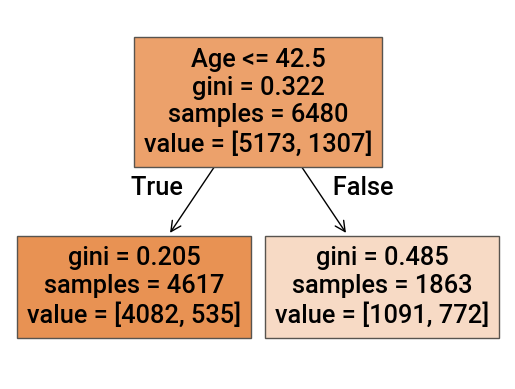

In [24]:
## plot the tree (diagram)
from sklearn.tree import plot_tree

plot_tree(dt, feature_names = X_train.columns, filled = True);

In [28]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
993,589,50,5,144895.05,2,1,1,34941.23,True,False,False
802,719,47,9,116393.59,1,1,0,63051.32,False,True,False
4121,700,31,7,0.00,2,0,1,145151.96,False,True,True
3083,821,38,8,0.00,2,0,1,126241.40,False,True,False
6159,666,74,7,105102.50,1,1,1,46172.47,True,False,True


In [25]:
## DECISION BOUNDARIES
## only able to plot with variables
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def plot_decision_boundaries(X, y, model_class, **model_params):
    """
    Function to plot the decision boundaries of a classification model.
    This uses just the first two columns of the data for fitting
    the model as we need to find the predicted value for every point in
    scatter plot.
    Arguments:
            X: Feature data as a NumPy-type array.
            y: Label data as a NumPy-type array.
            model_class: A Scikit-learn ML estimator class
            e.g. GaussianNB (imported from sklearn.naive_bayes) or
            LogisticRegression (imported from sklearn.linear_model)
            **model_params: Model parameters to be passed on to the ML estimator

    Typical code example:
            plt.figure()
            plt.title("KNN decision boundary with neighbros: 5",fontsize=16)
            plot_decision_boundaries(X_train,y_train,KNeighborsClassifier,n_neighbors=5)
            plt.show()
    """
    try:
        X = np.array(X)
        y = np.array(y).flatten()
    except:
        print("Coercing input data to NumPy arrays failed")
    # Reduces to the first two columns of data
    reduced_data = X[:, :2]
    # Instantiate the model object
    model = model_class(**model_params)
    # Fits the model with the reduced data
    model.fit(reduced_data, y)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    # Meshgrid creation
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predictions to obtain the classification results
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plotting
    plt.contourf(xx, yy, Z, alpha=0.4,cmap=plt.cm.Greys)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.xlabel("Feature-1",fontsize=15)
    plt.ylabel("Feature-2",fontsize=15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

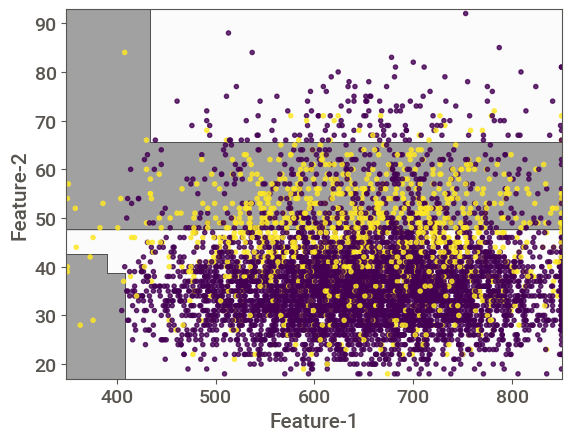

In [27]:
plot_decision_boundaries(X_train, y_train, DecisionTreeClassifier, max_depth = 3)

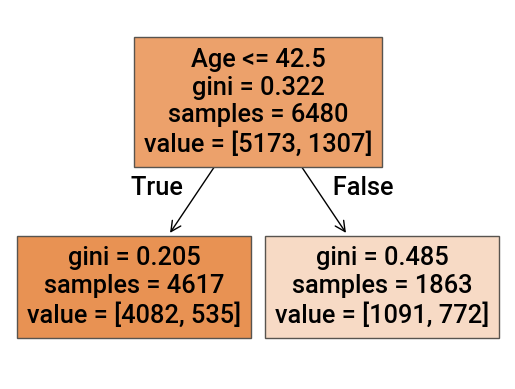

In [29]:
plot_tree(dt, feature_names = X_train.columns, filled = True);

In [31]:
## What is the GINI INDEX on the root node?
p1 = 5173 / (5173 + 1307) ## fraction of customers who DID NOT CHURN
p2 = 1307 / (5173 + 1307) ## fraction of customers who CHURNED

## GINI
2*p1*p2

0.32203127381496727

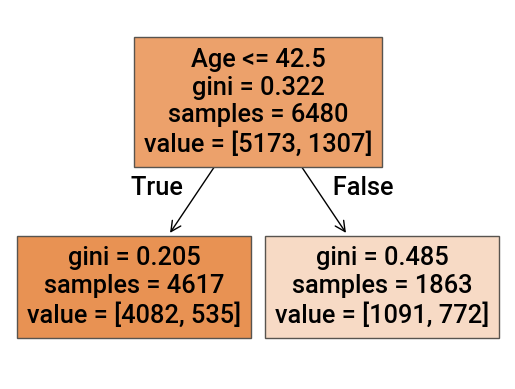

In [32]:
plot_tree(dt, feature_names = X_train.columns, filled = True);

In [33]:
## PARENT NODE GINI = 0.322 - n = 6480

## left child node
## GINI = 0.205  --- n = 4617

## right child node
## GINI = 0.485  --- n = 1863

## What is the COMBINED GINI of the children node?
(4617 / 6480)*0.205 +  (1863/6480)* 0.485

0.2855

In [34]:
## The improvement in the GINI (from parent to children nodes)
## Impurity Decrease
0.322 - 0.2855

0.03650000000000003